# Prédiction de fidélisation client 

> Ceci est un exemple de projet de prediction de fidelisation client. j'ai utilise les données "Churn_modeling.csv" que j'ai telecharger sur Kaggle. 

By __Aichatou Boubacar Soumana__

# Les etapes à suivre sont:
1. Importer les biliothéques nécessaires
2. Charger les données
3. Pré-traiter les données
4. Construire le modèle
5. Entraîner le modèle
6. Évaluer le modèle
7. Prédire la fidélisation client

## 1. Importer les bibliothèques nécessaires 

In [73]:
import os
import pandas as pd
import tkinter as tk
import joblib
import pickle
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2. Charger les données

In [74]:
os.getcwd()


'/Users/mac/Documents'

> j'ai commencé par charger les données d'un fichier CSV à l'aide de la bibliothèque Pandas

In [75]:
df = pd.read_csv("churn_modeling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [76]:
#df.head()
#df.tail()
df.shape
print("Nombre de ligne:", df.shape[0])
print("Nombre de colonne:", df.shape[1])

Nombre de ligne: 10000
Nombre de colonne: 14


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [78]:
df=df.replace(to_replace=["Spain", "Germany","France"],
           value=["Niamey", "Maradi", "Tahoua"])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Tahoua,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Niamey,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Tahoua,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Tahoua,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Niamey,Female,43,2,125510.82,1,1,1,79084.10,0


## checker les valeurs null du dataset

In [79]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## obtenir les statistiques globales de l'ensemble de données

In [80]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## suppression des éléments non pertinents

In [81]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [82]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Tahoua,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Niamey,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Tahoua,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Tahoua,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Niamey,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Tahoua,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Tahoua,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Tahoua,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Maradi,Male,42,3,75075.31,2,1,0,92888.52,1


## encodage de données catégorielles

> Le codage des données catégorielles est un processus de conversion des données catégorielles en format entier afin que les données avec les valeurs catégorielles converties puissent être fournies aux modèles pour donner et améliorer les prédictions.

In [83]:
df["Geography"].unique()

array(['Tahoua', 'Niamey', 'Maradi'], dtype=object)

In [84]:
df.Geography=df.Geography.map({"Maradi":1,"Niamey":2, "Tahoua":3})

In [85]:
df.Geography.value_counts()

3    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [86]:
df.Gender=df.Gender.map({"Male":1, "Female":0})

In [87]:
df.Gender.value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [88]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,3,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,3,0,42,8,159660.80,3,1,0,113931.57,1
3,699,3,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


> **value_counts()** : Renvoie une série contenant le nombre de valeurs uniques.

In [89]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## les déséquilibres non traites

> ici notre target sera "Exited" or quitté
> **Target(Variable cible)** d'un ensemble de données est la caractéristique de l'ensemble de données qu'on souhaite mieux comprendre.
>> X = variables independants  
>> y = variable cible

In [90]:
X= df.drop("Exited", axis=1)
y = df["Exited"]

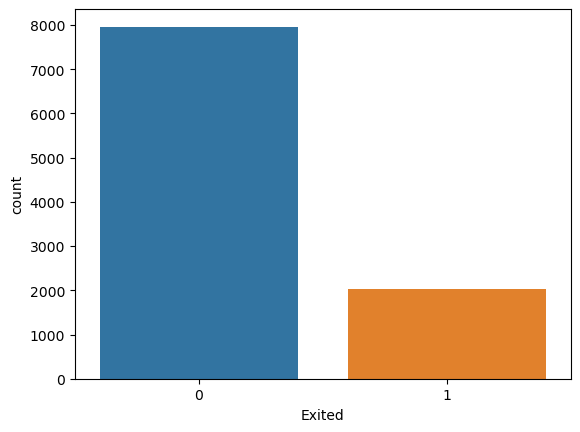

In [91]:
df= sns.countplot(x=df["Exited"],data=df)

## Traitement des données déséquilibrées avec SMOTE

> **La technique de suréchantillonnage synthétique des minorités (SMOTE) est une technique statistique permettant d'augmenter le nombre de cas dans l'ensemble de données de manière équilibrée**

> - d'apres le graphe, les classes sont desequilibres.
> - en Machine Learning, c'est ce qu'on cherche a eviter.
> - Dans les projets de Machine Learning, les modèles fonctionnent bien si les proportions des classes du jeu de données sont équilibrées.

In [92]:
oversample = SMOTE()

In [93]:
#X_eq, y_eq = SMOTE.fit_resample(X, y)
X_eq, y_eq = oversample.fit_resample(X, y)

In [94]:
X_eq,y_eq.value_counts()

(       CreditScore  Geography  Gender  Age  Tenure        Balance  \
 0              619          3       0   42       2       0.000000   
 1              608          2       0   41       1   83807.860000   
 2              502          3       0   42       8  159660.800000   
 3              699          3       0   39       1       0.000000   
 4              850          2       0   43       2  125510.820000   
 ...            ...        ...     ...  ...     ...            ...   
 15921          552          2       0   52       4       0.000000   
 15922          738          1       0   50       4  108640.910474   
 15923          686          2       0   40       5  128951.889603   
 15924          634          3       0   36       3  181764.461606   
 15925          523          2       0   62       4       0.000000   
 
        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
 0                  1          1               1    101348.880000  
 1                  1 

## Diviser l'ensemble de données en un ensemble de formation et un ensemble de test

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_eq, y_eq, test_size=0.2, random_state=42)

## feature scaling

> **feature scaling(mise à l'échelle des caractéristiques):** est une méthode utilisée pour normaliser la gamme des variables indépendantes ou des caractéristiques des données.

In [96]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.04323297,  1.11381905, -0.83626934, ..., -1.29088637,
        -0.76676899, -0.01118519],
       [ 1.0964569 ,  1.11381905,  1.195787  , ..., -1.29088637,
         1.30417376,  0.7406963 ],
       [-0.6130779 , -1.27166547, -0.83626934, ..., -1.29088637,
         1.30417376,  0.28028587],
       ...,
       [ 0.19785527,  1.11381905,  1.195787  , ...,  0.77466152,
        -0.76676899, -0.06190572],
       [-0.81033191,  1.11381905, -0.83626934, ...,  0.77466152,
        -0.76676899,  1.00512622],
       [ 0.52661196, -1.27166547,  1.195787  , ...,  0.77466152,
         1.30417376, -0.82782921]])

## Logistic Regression

> - La régression logistique est un exemple d'apprentissage supervisé. Elle est utilisée pour calculer ou prédire la probabilité d'un événement binaire (oui/non) 
> - L'apprentissage automatique supervisé est généralement utilisé pour classer les données ou faire des prédictions 
> - l'apprentissage non supervisé est généralement utilisé pour comprendre les relations au sein des ensembles de données.

In [97]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
accuracy_score(y_test, y_pred1)

0.7827997489014438

In [98]:
precision_score(y_test, y_pred1)

0.7722960151802657

## SVC (Support Vector Classifier)

In [99]:
sv = SVC()
sv.fit(X_train, y_train)
y_pred2 = sv.predict(X_test)
accuracy_score(y_test, y_pred2)


0.835216572504708

In [100]:
precision_score(y_test, y_pred2)

0.832901554404145

## Kneighbors Classifier

In [101]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
accuracy_score(y_test, y_pred3)

0.8283113622096673

In [102]:
precision_score(y_test, y_pred3)

0.8167506297229219

## Decision Tree Classifier

In [103]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)
accuracy_score(y_test, y_pred4)

0.7969240426867545

In [104]:
precision_score(y_test, y_pred4)

0.7758830694275274

## Random Forest Classifier

In [105]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred5 = rf.predict(X_test)
accuracy_score(y_test, y_pred5)

0.8618957940991839

In [106]:
precision_score(y_test, y_pred5)

0.8574181117533719

## Gradient Boosting Classifier

In [107]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred6 = gb.predict(X_test)
accuracy_score(y_test, y_pred6)

0.8383553044569994

In [108]:
precision_score(y_test, y_pred6)

0.836139896373057

> Structurè les donnees en ligne et colonne

In [109]:
final_data = pd.DataFrame({"Models": ["LR", "SV","KNN","DT","RF","GB"], "ACC":[accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3),accuracy_score(y_test, y_pred4),accuracy_score(y_test, y_pred5),accuracy_score(y_test, y_pred6)]})
final_data

,Models,ACC
0,LR,0.782800
1,SV,0.835217
2,KNN,0.828311
3,DT,0.796924
4,RF,0.861896
5,GB,0.838355


<Axes: xlabel='Models', ylabel='ACC'>

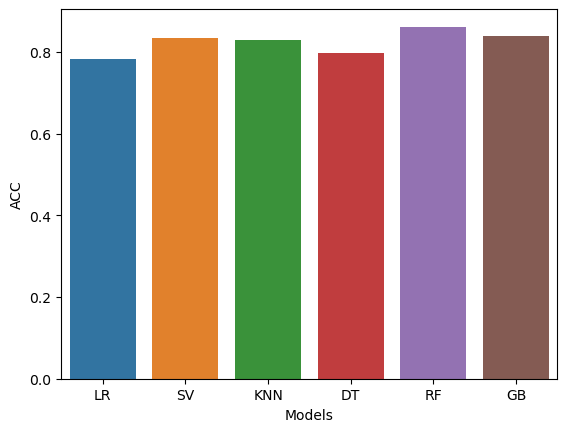

In [110]:
sns.barplot(data=final_data, x=final_data["Models"], y=final_data["ACC"])

## Enregistrer le model

In [111]:
X_eq = sc.fit_transform(X_eq)
rf.fit(X_eq, y_eq)

RandomForestClassifier()

In [112]:
joblib.dump(rf, "Customer_Churn_Prediction.pkl")
model = joblib.load("Customer_Churn_Prediction.pkl")

In [113]:
model.predict([[205, 21,1, 20.86, 2,0,0,542.58,2,1]])

array([0])

In [114]:
# pickling the Model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf, file)

In [115]:
# pickling the Model
import pickle
file = "Ml_model.pkl"
with open(file, "wb") as f:
    pickle.dump(rf, f)

## Interface graphique

In [ ]:
#from tkinter import *

In [ ]:
#def show_entry_fields():
    A1 = int(e1.get())
    A2 = int(e2.get())
    A3 = int(e3.get())
    A4 = float(e4.get())
    A5 = int(e5.get())
    A6 = int(e6.get())
    A7 = int(e7.get())
    A8 = float(e8.get())
    A9 = int(e9.get())
    if A9 == 1:
        Geography_Maradi = 1
        Geography_Niamey = 0
        Geography_Tahoua = 0
    elif A9 == 2:
        Geography_Maradi = 0
        Geography_Niamey = 1
        Geography_Tahoua = 0
    elif A9 == 3:
        Geography_Maradi = 0
        Geography_Niamey = 0
        Geography_Tahoua = 1
    A10 = int(e10.get())
    
    model = joblib.load("Customer_Churn_Prediction.pkl")
    resultat = model.predict(sc.transform([["A1","A2","A3","A4","A5","A6","A7","A8","Geography", "A10"]]))
    if resultat == 0:
        Label(master, text="Le client restera a la banque").grid(row=31)
    else:
        Label(master, text="Le client quittera la banque").grid(row=31)
    
        
master= Tk()
master.title("Prediction de la fidelisation client")
label=Label(master, text="Prediction de la fidelisation client avec machine learning",bg = "black", fg = "white").grid(row=0, columnspan=2)

Label(master, text="Cote de crédit").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Durée du contrat").grid(row=3)
Label(master, text="Saisir le solde du compte").grid(row=4)
Label(master, text="Nombre de produits").grid(row=5)
Label(master, text="Le client possède-t-il une carte de crédit ? (1=Oui, 0=Non)").grid(row=6)
Label(master, text="Le client est-il un membre actif (1=Oui, 0=Non)").grid(row=7)
Label(master, text="Saisir le salaire estimé").grid(row=8)
Label(master, text="Entrez votre region").grid(row=9)
Label(master, text="Sexe du client(1=Homme, 0=Femme)").grid(row=10)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)

Button(master, text="Prediction", command="show_entry_fields").grid()

mainloop()